## Gini Index vs. GDP (by Country)
The propsed hypothesis for this notebook is: "Income inequality increases with the increase of a Nations Gross Domestic Product". 
To test this hypothesis the following notebook will look to explore the relation between these two common performance metrics of a range of countries.

## Import libraries and prepare the general dataset
Import the appropriate libraries that will be used for analysis throughout the notebook. Additionally, perpare the dataset for analysis. This dataset was acquired from the OECD Statistics data website, and comprises the GDP of the OECD member nations over the period 2016 to present.

In [18]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Load current .csv dataset for GDP data
gdpData = "datasets/GDP_2016_2020.csv"

# columns = {'Country','Metric', 'Subject','Measure', 'Frequency','Year', 'Value', 'Flag'}
rawGdp_df = pd.read_csv(gdpData)

rawGdp_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GDP,TOT,USD_CAP,A,2016,50237.794429,NaN
1,AUS,GDP,TOT,USD_CAP,A,2017,50853.615427,NaN
2,AUS,GDP,TOT,USD_CAP,A,2018,53061.634053,NaN
3,AUS,GDP,TOT,USD_CAP,A,2019,53067.877181,E
4,AUT,GDP,TOT,USD_CAP,A,2016,52665.087457,NaN


## Keep only most relevant entry for each country
Since the dataset encompases reported GDP data from each country over the period of 2016 to present, some countries will report these values at different intervals than others. This will result in multiple entries for many nations, but only single entries for other. All of which are distributed over several years. Here the data is processed to only retain the most recent reported entry for each country (removing the previous entries), so that only one entry per country remains.

In [19]:
# Sort the GDP data by Year.
gdp_df = rawGdp_df.copy().sort_values(by='TIME', ascending=False)
gdp_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
99,POL,GDP,TOT,USD_CAP,A,2020,33356.123878,NaN
13,BEL,GDP,TOT,USD_CAP,A,2020,51688.583464,P
32,FIN,GDP,TOT,USD_CAP,A,2020,50176.937881,NaN
27,DNK,GDP,TOT,USD_CAP,A,2020,59346.890596,NaN
166,SVN,GDP,TOT,USD_CAP,A,2020,38727.415299,NaN


In [20]:
# From the sorted data, drop the reported values for each country except the most recent report.
gdp_df = gdp_df.drop_duplicates(subset=['LOCATION'], keep='first')
gdp_df = gdp_df.drop(columns=['Flag Codes','SUBJECT','FREQUENCY','INDICATOR', 'MEASURE'])
gdp_df.rename(columns={'Value':'GDP'}, inplace=True)
gdp_df

,LOCATION,TIME,GDP
99,POL,2020,33356.123878
13,BEL,2020,51688.583464
32,FIN,2020,50176.937881
27,DNK,2020,59346.890596
166,SVN,2020,38727.415299
...,...,...,...
232,MKD,2018,16725.791726
168,ZAF,2017,12810.965544
141,CHN,2017,14306.396116
153,IDN,2017,11050.882373


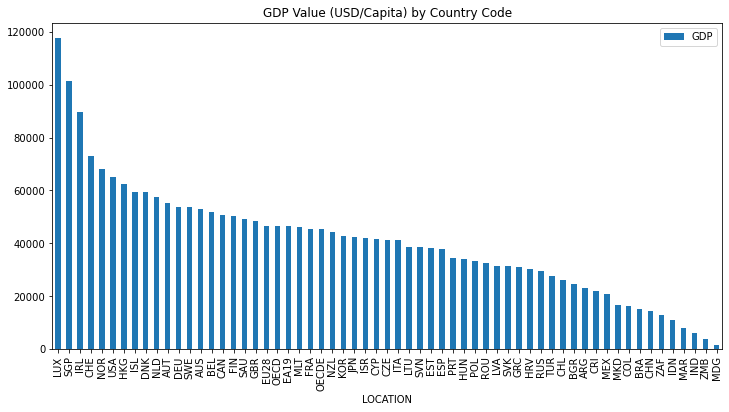

In [21]:
# Plot the GDP data for each country code.
gdp_df = gdp_df.sort_values(by='GDP', ascending=False)
gdp_df[['LOCATION','GDP']].plot(kind='bar', x='LOCATION', figsize=(12,6), title='GDP Value (USD/Capita) by Country Code')
plt.show()

## Read in the Gini Index

In [22]:
# Load current .csv dataset for Gini data
giniData = "datasets/Gini Index.csv"

# columns = {'Country','Metric', 'Subject','Measure', 'Frequency','Year', 'Value', 'Flag'}
rawGini_df = pd.read_csv(giniData)

rawGini_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,INCOMEINEQ,GINI,INEQ,A,2012,0.326,NaN
1,AUS,INCOMEINEQ,GINI,INEQ,A,2014,0.337,NaN
2,AUS,INCOMEINEQ,GINI,INEQ,A,2016,0.330,NaN
3,AUS,INCOMEINEQ,GINI,INEQ,A,2018,0.325,NaN
4,AUT,INCOMEINEQ,GINI,INEQ,A,2007,0.284,NaN


## Keep only most relevant entry for each country
Since the dataset encompases reported Gini Index from each country over the period of 1976 to present, some countries will report these values at different intervals than others. This will result in multiple entries for many nations, but only single entries for other. All of which are distributed over several years. Here the data is processed to only retain the most recent reported entry for each country (removing the previous entries), so that only one entry per country remains.

In [23]:
# Sort the Gini Index by Year.
gini_df = rawGini_df.copy().sort_values(by='TIME', ascending=False)
gini_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
410,CRI,INCOMEINEQ,GINI,INEQ,A,2019,0.478,NaN
443,ROU,INCOMEINEQ,GINI,INEQ,A,2018,0.350,NaN
294,SWE,INCOMEINEQ,GINI,INEQ,A,2018,0.275,NaN
352,ISR,INCOMEINEQ,GINI,INEQ,A,2018,0.348,NaN
59,CAN,INCOMEINEQ,GINI,INEQ,A,2018,0.303,NaN


In [24]:
# From the sorted data, drop the reported values for each country except the most recent report.
gini_df = gini_df.drop_duplicates(subset=['LOCATION'], keep='first')
gini_df = gini_df.drop(columns=['INDICATOR','Flag Codes','SUBJECT','MEASURE','FREQUENCY'])
gini_df.rename(columns={'Value':'GINI'}, inplace=True)
gini_df

,LOCATION,TIME,GINI
410,CRI,2019,0.478
443,ROU,2018,0.350
294,SWE,2018,0.275
352,ISR,2018,0.348
59,CAN,2018,0.303
232,NOR,2018,0.262
120,FRA,2018,0.301
246,POL,2018,0.281
430,BGR,2018,0.408
288,ESP,2018,0.330


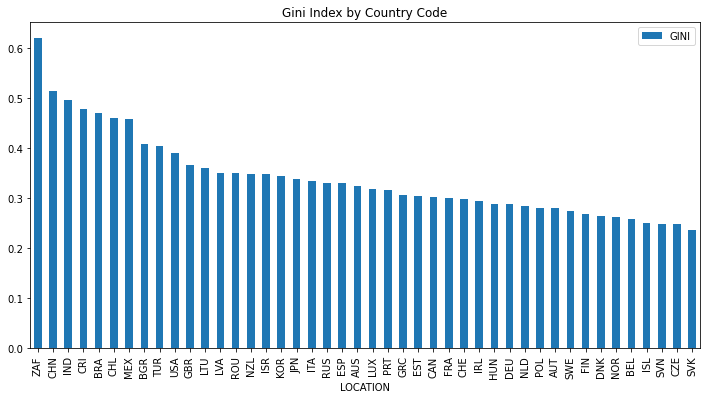

In [25]:
# Plot the Gini Index for each country code.
gini_df = gini_df.sort_values(by='GINI', ascending=False)
gini_df[['LOCATION','GINI']].plot(kind='bar', x='LOCATION', figsize=(12,6), title='Gini Index by Country Code')
plt.show()

## Get Country names from Country Code
Due to the format of the GDP data that was aqcuired the label of each country in the dataset was a 3 letter country code, rather than the country's name itself. To allow the data to be more human readable, the data would need appropriate labelling to identify the country by name. Through some additional processing these country codes could be matched with their corresponding country name.

In [26]:
# Fetch country code from website.
codes_df = pd.read_html('https://laendercode.net/en/3-letter-list.html')[0]
codes_df.head()
# Join the sorted data on the Country code, to get appropriate country name
merged_df = gini_df.merge(codes_df, left_on=['LOCATION'], right_on=['ISO 3166 ALPHA-3'])
merged_df.head()

,LOCATION,TIME,GINI,ISO 3166 ALPHA-3,Country
0,ZAF,2015,0.620,ZAF,South Africa
1,CHN,2011,0.514,CHN,China
2,IND,2011,0.495,IND,India
3,CRI,2019,0.478,CRI,Costa Rica
4,BRA,2013,0.470,BRA,Brazil


## Merging the Datasets
This set merges the GDP data set and the Gini Index dataset based on country code. One of the issues is some countries did not report the Gini Index in the last 3 years so some of the data years do not match correctly.

In [27]:
# Join the sorted data on the Country code, to get appropriate country name
merged_df = merged_df.merge(gdp_df, left_on=['LOCATION'], right_on=['LOCATION'])
merged_df

,LOCATION,TIME_x,GINI,ISO 3166 ALPHA-3,Country,TIME_y,GDP
0,ZAF,2015,0.620,ZAF,South Africa,2017,12810.965544
1,CHN,2011,0.514,CHN,China,2017,14306.396116
2,IND,2011,0.495,IND,India,2016,5901.210840
3,CRI,2019,0.478,CRI,Costa Rica,2019,21759.381303
4,BRA,2013,0.470,BRA,Brazil,2018,15272.368950
5,CHL,2017,0.460,CHL,Chile,2019,26128.403651
6,MEX,2016,0.458,MEX,Mexico,2019,20741.101487
7,BGR,2018,0.408,BGR,Bulgaria,2019,24579.331314
8,TUR,2015,0.404,TUR,Turkey,2019,27599.829476
9,USA,2017,0.390,USA,United States,2019,65240.379025


(0.0, 1.0)

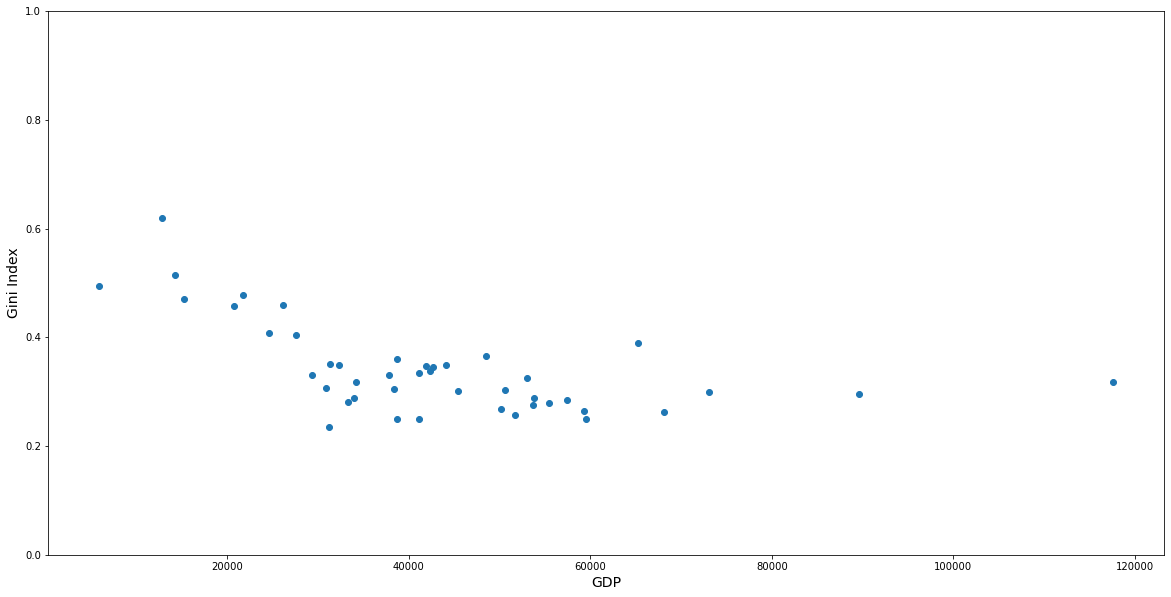

In [28]:
plt.figure(figsize=(20,10))
plt.scatter(merged_df['GDP'], merged_df['GINI'])
plt.xlabel('GDP', fontsize=14)
plt.ylabel("Gini Index",fontsize=14)
plt.ylim(ymin=0, ymax=1)

## GDP and Gini Index Correlation
From the plot comparison there is some visual evidence that a relation exists between the GDP of a nation and its measure of wealth inequailty. Further analysis would help clarify these initial impressions, which could be performed through the Pearson's Correlation coefficient. Due to the variability in the data, the Spearman Rank Correlation would also be performed.

In [29]:
# Pearson's Correlation Coefficient
pearson = merged_df['GINI'].corr(merged_df['GDP'])
spearman = merged_df['GINI'].corr(merged_df['GDP'], method='spearman')
print(f'Pearson\'s Correlation Coefficient between GDP Value and Cost of Living Index: {pearson}')
print(f'Spearman\'s Rank Correlation between GDP Value and Cost of Living Index: {spearman}')

Pearson's Correlation Coefficient between GDP Value and Cost of Living Index: -0.5746978831043248
Spearman's Rank Correlation between GDP Value and Cost of Living Index: -0.6013108761145487


## Interactive Plot
An interactive plot of GDP vs Gini Index that uses a slider for the year. 
Note: Countries do not report the GINI Index every year so some years have less data points. TODO: Handle missing values

In [54]:
# Load current .csv dataset for GDP data
gdpData2000 = "datasets/GDP_Selected_2000_2020_OECD.csv"

# columns = {'Country','Metric', 'Subject','Measure', 'Frequency','Year', 'Value', 'Flag'}
rawGdp_df = pd.read_csv(gdpData2000)
rawGdp_df = rawGdp_df.drop(columns=['Flag Codes','SUBJECT','FREQUENCY','INDICATOR', 'MEASURE'])
rawGdp_df.rename(columns={'Value':'GDP'}, inplace=True)

# columns = {'Country','Metric', 'Subject','Measure', 'Frequency','Year', 'Value', 'Flag'}
rawGini_df = pd.read_csv(giniData)
rawGini_df = rawGini_df.drop(columns=['INDICATOR','Flag Codes','SUBJECT','MEASURE','FREQUENCY'])
rawGini_df.rename(columns={'Value':'GINI'}, inplace=True)

plotdf = rawGini_df.merge(rawGdp_df, how='right', left_on=['LOCATION','TIME'], right_on=['LOCATION','TIME'])
plotdf.sort_values('TIME',inplace=True)

# We can attempt to fill in the missing data using interpolate
plotdf['GINI'].interpolate()
print (plotdf.dtypes)
plotdf

LOCATION     object
TIME          int64
GINI        float64
GDP         float64
dtype: object


,LOCATION,TIME,GINI,GDP
0,AUS,2000,NaN,28252.629885
454,PRT,2000,NaN,18884.873913
433,POL,2000,NaN,10677.498720
412,NOR,2000,NaN,36952.282492
1093,ROU,2000,NaN,5852.670844
...,...,...,...,...
165,FRA,2020,NaN,45494.488417
144,FIN,2020,NaN,50176.937881
123,DNK,2020,NaN,59346.890596
61,BEL,2020,NaN,51688.583464


In [55]:
px.scatter(plotdf, x="GDP", y="GINI", animation_frame="TIME", 
#            animation_group="country",size="pop", color="continent", 
           hover_name="LOCATION", color="LOCATION",
           size_max=55, range_x=[0,120000], range_y=[0,1])